# Introduction

1. [Read Data and PreCheck](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        1. [Age Variable](#4)
        1. [Sex Variable](#5)
        1. [BP Variable](#6)
        1. [Cholesterol Variable](#7)
        1. [Na_to_K Variable](#8)
        1. [Drug Variable](#9)
1. [Basic Data Analysis and Visualization](#10)
    * [Age -- Drug](#11)
    * [Sex -- Drug](#12)
    * [BP -- Drug](#13)
    * [Na_to_K -- Drug](#14)
    * [Cholesterol -- Drug](#15)
    * [Na_to_K -- BP -- Drug](#16)
1. [Preparing Data and Feature Engineering](#17)
    * [Create New Features](#18)
        * [Na_to_K_Bigger_Than_15](#19)
    * [Label Encoding](#20)
    * [Train Test Split](#21)
1. [Model Implementation](#22)
    1. [KNN Classifier](#23)
        * [Default Parameters](#24)
        * [GridSearchCV](#25)
    2. [Random Forest Classifier](#26)
        * [Default Parameters](#27)
        * [GridSearchCV](#28)
    3. [SVM Classifier](#29)
        * [Default Parameters](#30)
        * [GridSearchCV](#31)
1. [Conclusion](#32)

In [54]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

<a id='1'></a>
# Read Data and PreCheck

In [2]:
df = pd.read_csv("drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

* No missing value
* 6 columns
* 200 rows

<a id='2'></a>
# Variable Description

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood 
* Drug: Drug Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* float64(1): Na_to_K
* int64(1): Age
* object(4): Sex, BP, Cholesterol, Drug

<a id='3'></a>
## Univariate Variable Analysis

<a id='4'></a>
### Age Variable

In [8]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


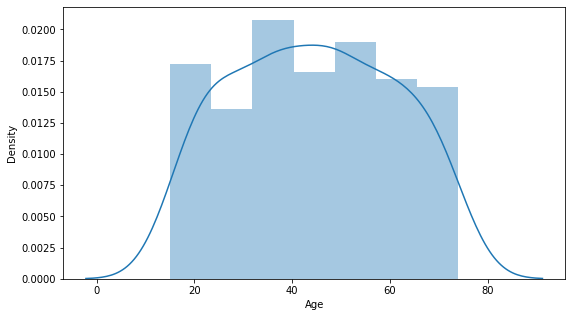

In [9]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

* Age range is between 15 and 74.

<a id='5'></a>
### Sex Variable

In [10]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

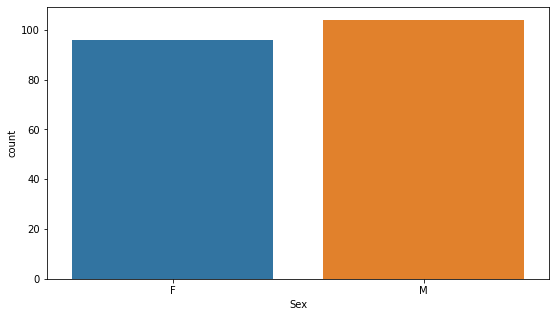

In [11]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

* The ratio of gender seems balanced in the data
* This is a categorical variable. It would be better if we apply label encoder to avoid any error during model implementation.

<a id='6'></a>
### BP Variable

In [12]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

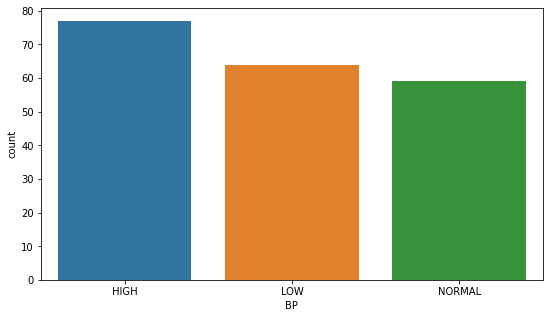

In [13]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

<a id='7'></a>
### Cholesterol Variable

In [14]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

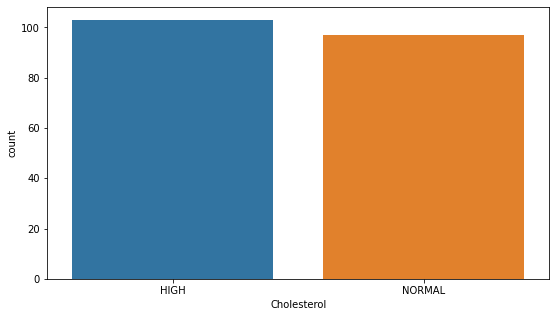

In [15]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

* Cholesterol is a balanced data. 
* It is categorical and label encoder will apply on it.

<a id='8'></a>
### Na_to_K Variable

In [16]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


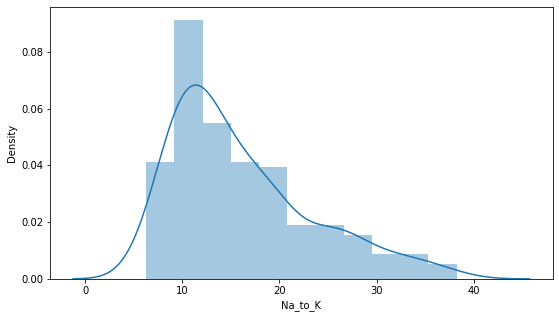

In [17]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

<a id='9'></a>
### Drug Variable

In [18]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

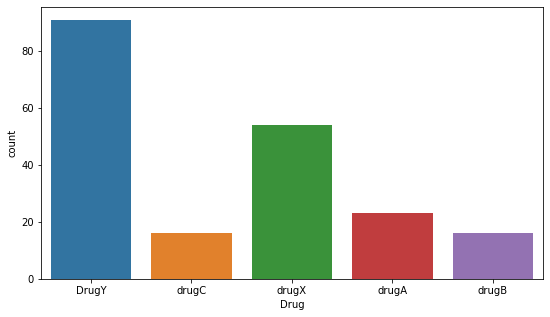

In [19]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

* Drug is target column and we can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

<a id='10'></a>
# Basic Data Analysis

* Age -- Drug
* Sex -- Drug
* BP -- Drug
* Cholesterol -- Drug

<a id='11'></a>
## Age -- Drug

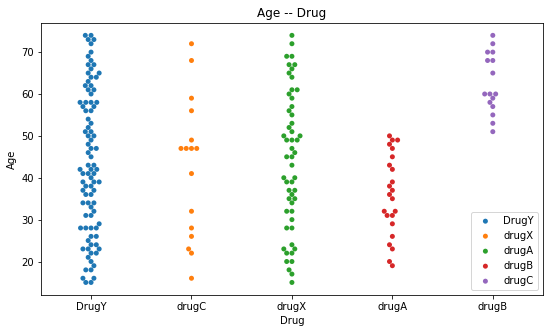

In [20]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [21]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


* DrugB is taken only by older than 51 years old. 
* DrugA is taken only by younger than 50 years old. 

<a id='12'></a>
## Sex -- Drug

In [22]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


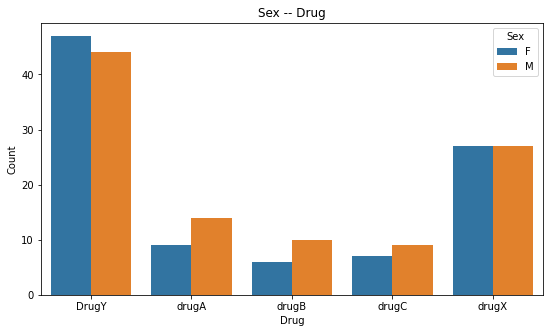

In [23]:

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

* Female people get drugA, drugB and drugC more than male people.
* Male people get DrugY more than female people.
* drugX seems equal for male and female people.
* According to this graph, Sex feature is not an important feature for classification.

<a id='13'></a>
## BP -- Drug

In [24]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


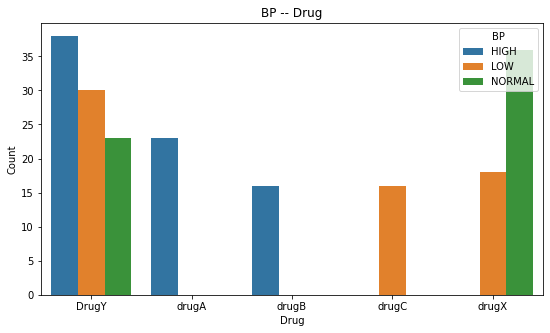

In [25]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

<a id='14'></a>
## Na_to_K -- Drug

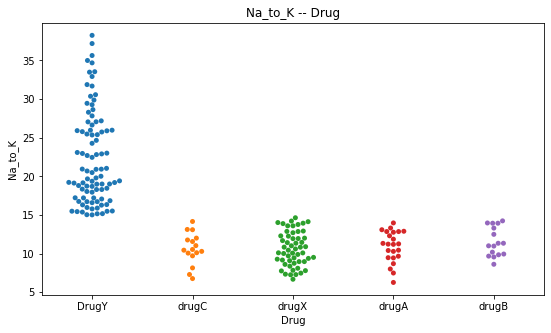

In [26]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [27]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


* People who have Na_to_K ratio is bigger than 15, get DrugY.
* We can create a new feature from here.

<a id='15'></a>
## Cholesterol -- Drug

In [28]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


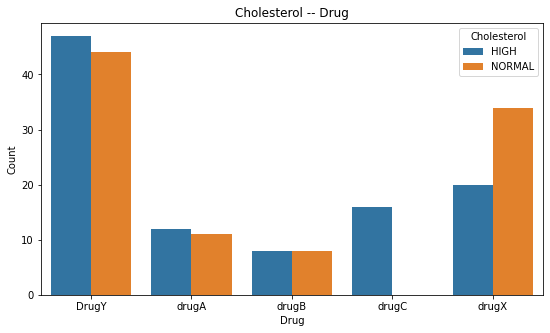

In [29]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

* drugC is got by people who have HIGH cholesterol.
* Cholesterol is an important feature to classify drugC

<a id='16'></a>
## Na_to_K -- BP -- Drug

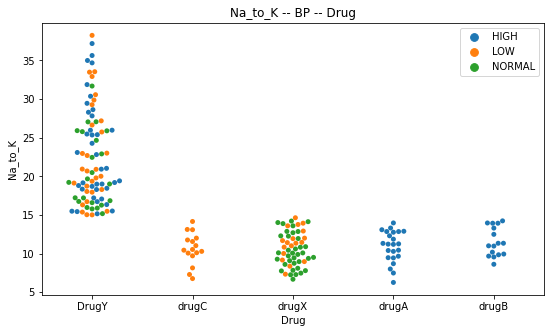

In [30]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

<a id='17'></a>
# Preparing Data and Feature Engineering

<a id='18'></a>
## Create New Features

<a id='19'></a>
### Na_to_K_Bigger_Than_15 

If Na_to_K is bigger than 15, it is always drugY.

In [31]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [32]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


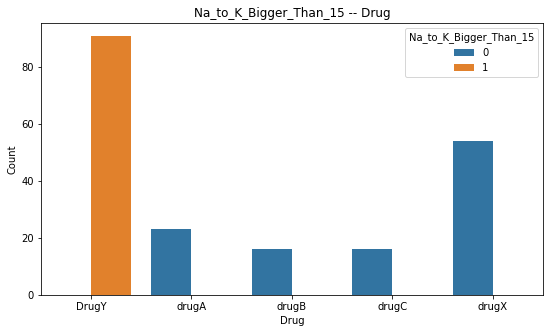

In [33]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

* Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

<a id='20'></a>
## Label Encoding

We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [34]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [35]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [36]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


<a id='21'></a>
## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


Data was splitted as 80% train data and 20% test data.

<a id='22'></a>
# Model Implementation

I will try three models and compare their results. For all models, I apply GridSearchCV method to find best score. Also, to be sure our models performance are random, I will use 5 Fold Cross Validation method.

In [38]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

<a id='23'></a>
## KNN Classifier

To find best score of KNN model, I will try different value of n_neighbors, p, and weights parameters. 

<a id='24'></a>
### Default Parameters

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.59375
Test Score: 0.65


In [40]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

<a id='25'></a>
### GridSearchCV

In [41]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.75625
Test Score: 0.7


In [42]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

<a id='26'></a>
# Random Forest


To find best score of Random Forest model, I will try different value of n_estimators and criterion parameters.

<a id='27'></a>
### Default Parameters

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 0.975


In [44]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

<a id='28'></a>
### GridSearchCV

In [45]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}
Train Score: 0.9875
Test Score: 0.975


In [46]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

<a id='29'></a>
# SVM Classifier

To find best score of SVM model, I will try different value of C, kernel, degree and gamma parameters. The easy way to do this is GridSearchCV method.

<a id='30'></a>
### Default Parameters

In [47]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7125
Test Score: 0.65


In [48]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

<a id='31'></a>
### GridSearchCV

In [49]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))


Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9875
Test Score: 0.975


In [50]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

<a id='32'></a>
# Conclusion

In [51]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.59375
KNN GridSearch Train Score,0.75625
Random Forest Default Train Score,0.98125
Random Forest GridSearch Train Score,0.98750
SVM Default Train Score,0.71250
SVM GridSearch Train Score,0.98750


In [52]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.650
KNN GridSearch Test Score,0.700
Random Forest Default Test Score,0.975
Random Forest GridSearch Test Score,0.975
SVM Default Test Score,0.650
SVM GridSearch Test Score,0.975


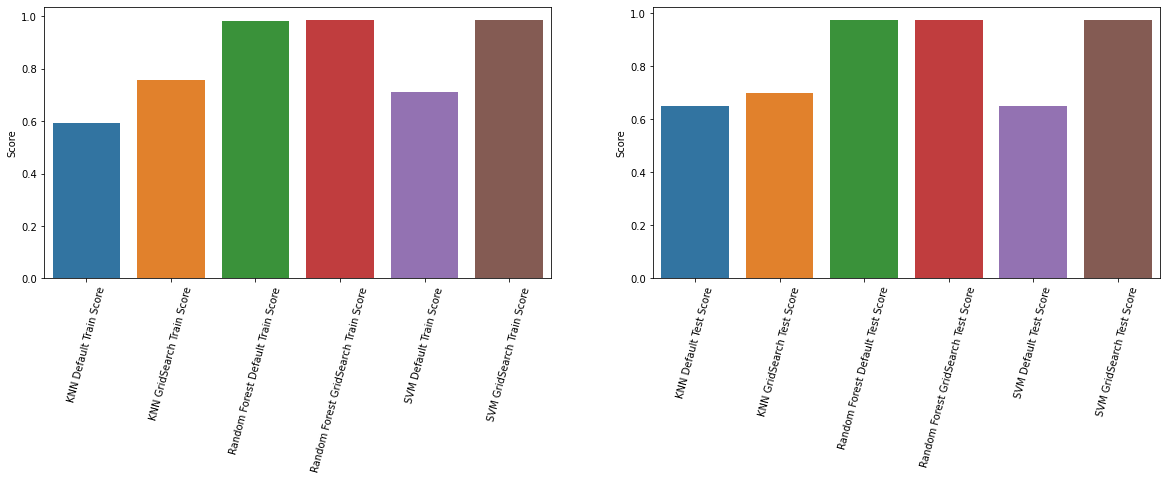

In [53]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

* Random Forest classifier  and SVM classifier (after hyperparameter tuning) have a good scores.
* KNN classifier has worst score in three clasifiers.